In [99]:
G = 4 # g-force

type = "net_vertical" # "net_vertical" or "centripetal"

initial_velocity = 20 # m/s

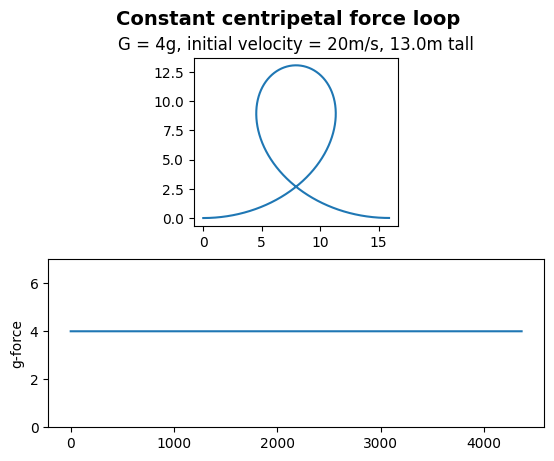

In [100]:
import matplotlib.pyplot as plt
import numpy as np

gravity = 9.81

ds = 0.01

xdata = []
ydata = []
forcedata = []

point = (0, 0)
theta = np.deg2rad(0)

height = 0

while True:
    velocity_squared = ((initial_velocity**2) / gravity) - 2 * point[1]
    curvature = (G / velocity_squared) if type == "centripetal" else ((G  - np.cos(theta)) / velocity_squared)

    theta = theta + curvature * ds

    x = point[0] + np.cos(theta) * ds
    y = point[1] + np.sin(theta) * ds

    height = max(y, height)

    force = (velocity_squared / (1/curvature)) + np.cos(theta)
    
    xdata.append(x)
    ydata.append(y)
    forcedata.append(force)
    point = (x, y)
    if theta > np.pi * 2:
        break

fig, axs = plt.subplots(2)
fig.suptitle('Constant centripetal force loop', fontsize=14, fontweight='bold')
axs[0].plot(xdata, ydata)
axs[0].set_title(f'G = {G}g, initial velocity = {initial_velocity}m/s, {height:.1f}m tall')
axs[0].set_aspect("equal", adjustable="box")

axs[1].set_ylim([0, 7])
axs[1].set_ylabel("g-force")
axs[1].plot(forcedata)

plt.show()